In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading training dataset
train=pd.read_csv('housing_train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [3]:
train.shape           

(1168, 81)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Above code represents the data types present inside data set.

In [5]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Above code shows the numeric values of data like mean, standard deviation adn min and max along with percentiles.

In [7]:
train.isnull().sum().sort_values(ascending=False)    #gives the information of null values present

PoolQC         1161
MiscFeature    1124
Alley          1091
Fence           931
FireplaceQu     551
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

<AxesSubplot:>

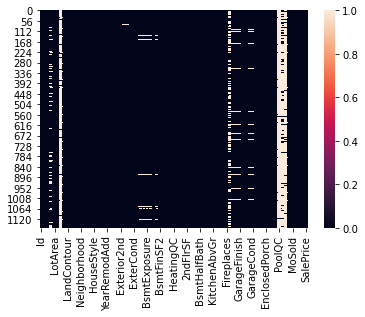

In [8]:
sns.heatmap(train.isnull())             #another visualization method to see null or missing values

In [9]:
#we will drop the column which have a large number of missing or null values or which is not contibuting towards target variable
train.drop(['MiscFeature','Alley','Fence','PoolQC','Id'],axis=1,inplace=True)

In [10]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,NaN,9819,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,172,0,0,0,0,7,2008,WD,Normal,40000


In [11]:
pd.set_option('display.max_columns',None)

In [12]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,NaN,9819,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,0,2,2010,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,0,5,2009,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,0,7,2009,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,0,7,2008,WD,Normal,40000


In [13]:
#fill null values with mean for integer and float datatypes
train['LotFrontage']=train['LotFrontage'].fillna(train.LotFrontage.mean())
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train.GarageYrBlt.mean())

In [14]:
#fill null values with mode for object data type
list=['BsmtCond','BsmtQual','FireplaceQu','GarageType','GarageCond','GarageFinish','GarageQual','MasVnrType','MasVnrArea','BsmtExposure','BsmtFinType2']
for item in list:
    train[item]=train[item].fillna(train[item].mode()[0])

<AxesSubplot:>

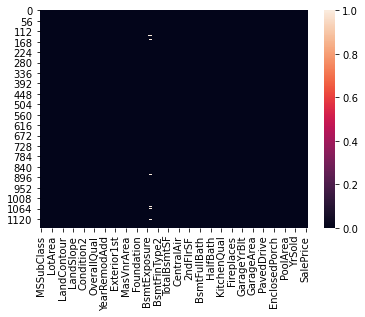

In [15]:
sns.heatmap(train.isnull())

In [16]:
#Loading test dataset
test=pd.read_csv('housing_test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [18]:
test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [19]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.00000,292.000000,292.000000,275.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,46.157534,557.315068,1042.767123,1133.691781,339.657534,3.702055,1477.051370,0.424658,0.065068,1.575342,0.359589,2.794521,1.05137,6.417808,0.595890,1979.760000,1.729452,457.458904,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,152.467119,411.043768,424.561153,366.941919,424.278825,38.219527,514.199429,0.508831,0.247070,0.547856,0.494795,0.807336,0.23616,1.728105,0.621259,23.868875,0.754430,210.785591,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,520.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,0.000000,1916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,255.000000,771.750000,858.000000,0.000000,0.000000,1061.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1964.000000,1.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,0.000000,487.000000,971.000000,1047.500000,0.000000,0.000000,1440.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,1979.000000,2.000000,467.500000,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,0.000000,780.000000,1322.000000,1370.500000,717.000000,0.000000,1720.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,2003.000000,2.000000,569.750000,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,1085.000000,1935.000000,3094.000000,2402.000000,1589.000000,479.000000,3447.000000,2.000000,1.000000,3.000000,2.000000,6.000000,3.00000,12.000000,2.000000,2010.000000,4.000000,1052.000000,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


In [20]:
test.isnull().sum().sort_values(ascending=False)    #gives the information of null values present

PoolQC           292
MiscFeature      282
Alley            278
Fence            248
FireplaceQu      139
                ... 
TotalBsmtSF        0
Heating            0
MSSubClass         0
CentralAir         0
SaleCondition      0
Length: 80, dtype: int64

<AxesSubplot:>

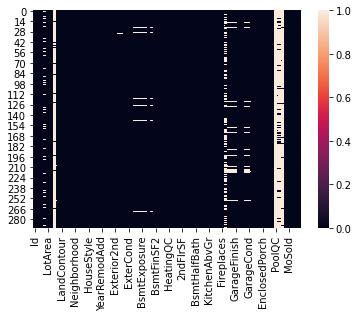

In [21]:
sns.heatmap(test.isnull())             #another visualization method to see null or missing values

In [22]:
#we will drop the column which have a large number of missing or null values or which is not contibuting towards target variable
test.drop(['MiscFeature','Alley','Fence','PoolQC','Id'],axis=1,inplace=True)

In [23]:
pd.set_option('display.max_columns',None)

In [24]:
test.isnull().sum().sort_values(ascending=False)

FireplaceQu      139
LotFrontage       45
GarageType        17
GarageYrBlt       17
GarageFinish      17
                ... 
BsmtUnfSF          0
TotalBsmtSF        0
MSZoning           0
HeatingQC          0
SaleCondition      0
Length: 75, dtype: int64

In [25]:
#fill null values with mean for integer and float datatypes
test['LotFrontage']=test['LotFrontage'].fillna(test.LotFrontage.mean())
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test.GarageYrBlt.mean())

In [26]:
#fill null values with mode for object data type
list=['BsmtCond','BsmtQual','FireplaceQu','GarageType','GarageCond','GarageFinish','GarageQual','MasVnrType','MasVnrArea','BsmtExposure','BsmtFinType2']
for item in list:
    test[item]=test[item].fillna(test[item].mode()[0])

<AxesSubplot:>

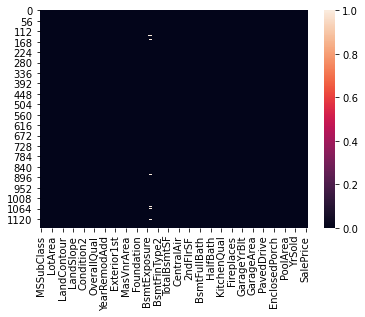

In [27]:
sns.heatmap(train.isnull())

In [28]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
lencode=LabelEncoder()

In [29]:
tr_data = train.copy()
ts_data = test.copy()

In [56]:
for col in tr_data.select_dtypes(include=['O']).columns:
    tr_data[col] = lencode.fit_transform(tr_data[col].astype(str))
    ts_data[col] = lencode.fit_transform(ts_data[col].astype(str))

In [57]:
tr_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,0,3,0,4,0,13,2,2,4,2,6,5,1976,1976,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,0,2,2007,8,4,128000
1,20,3,95.00000,15865,1,0,3,0,4,1,12,2,2,0,2,8,6,1970,1970,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,0,0,224,0,0,10,2007,8,4,268000
2,60,3,92.00000,9920,1,0,3,0,1,0,15,2,2,0,5,7,5,1996,1997,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,0,6,2007,8,4,269790
3,20,3,105.00000,11751,1,0,3,0,4,0,14,2,2,0,2,6,6,1977,1977,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,0,0,0,0,0,1,2010,0,4,190000
4,20,3,70.98847,16635,1,0,3,0,2,0,14,2,2,0,2,6,7,1977,2000,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,0,0,0,0,0,6,2009,8,4,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,3,70.98847,9819,1,0,3,0,4,0,19,2,2,0,2,5,5,1967,1967,1,1,7,7,1,31.0,3,2,1,3,3,3,1,450,5,0,432,882,1,4,1,4,900,0,0,900,0,0,1,0,3,1,3,5,6,0,2,5,1970.0,2,1,280,4,4,2,0,0,0,0,0,0,0,2,2010,8,4,122000
1164,20,3,67.00000,8777,1,3,3,0,4,0,7,1,2,0,2,4,5,1949,2003,1,1,11,12,2,0.0,3,4,1,3,3,3,6,0,5,0,0,0,1,0,1,4,1126,0,0,1126,0,0,2,0,2,1,2,5,6,0,2,5,2002.0,0,2,520,4,4,0,0,96,0,0,0,0,0,5,2009,8,4,108000
1165,160,3,24.00000,2280,1,3,3,0,2,0,13,2,2,3,5,6,6,1976,1976,1,1,8,2,2,0.0,3,4,1,2,3,3,0,566,5,0,289,855,1,4,1,4,855,601,0,1456,0,0,2,1,3,1,3,7,6,1,4,1,1976.0,2,2,440,4,4,2,87,0,0,0,0,0,0,7,2009,8,4,148500
1166,70,0,50.00000,8500,1,3,3,0,4,0,9,1,2,0,5,4,4,1920,1950,2,1,3,3,2,0.0,3,1,0,3,3,3,5,0,5,0,649,649,1,4,0,4,649,668,0,1317,0,0,1,0,3,1,3,6,6,0,2,5,1920.0,2,1,250,4,1,0,0,54,172,0,0,0,0,7,2008,8,4,40000


In [58]:
ts_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,86.000000,14157,1,0,1,0,0,0,21,2,0,0,2,9,5,2005,2006,3,0,9,11,3,200.0,2,3,2,0,2,1,2,1249,5,0,673,1922,0,0,1,3,1922,0,0,1922,1,0,2,0,3,1,2,8,5,1,2,1,2005.0,0,3,676,4,4,2,178,51,0,0,0,0,0,7,2007,5,2
1,120,2,66.425101,5814,1,0,3,0,1,0,21,2,0,4,2,8,5,1984,1984,1,0,5,5,2,0.0,2,3,1,2,2,0,2,1036,5,0,184,1220,0,2,1,3,1360,0,0,1360,1,0,1,0,1,1,2,4,5,1,0,1,1984.0,1,2,565,4,4,2,63,0,0,0,0,0,0,8,2009,0,0
2,20,2,66.425101,11838,1,3,3,0,4,0,4,2,0,0,2,8,5,2001,2001,3,0,9,11,2,0.0,2,3,2,2,2,0,5,0,5,0,1753,1753,0,0,1,3,1788,0,0,1788,0,0,2,0,3,1,0,7,5,1,4,1,2001.0,1,2,522,4,4,2,202,151,0,0,0,0,0,6,2009,5,2
3,70,2,75.000000,12000,1,3,0,0,4,0,5,2,0,0,5,7,7,1941,1950,1,0,6,7,2,0.0,3,3,1,3,2,3,4,275,5,0,429,704,0,0,1,3,860,704,0,1564,0,0,1,1,3,1,1,7,5,1,2,1,1941.0,2,1,234,4,4,2,0,0,0,0,0,0,0,7,2009,5,2
4,60,2,86.000000,14598,1,0,3,0,1,0,20,1,0,0,5,6,5,2007,2007,1,0,9,11,3,74.0,2,3,2,2,2,2,5,0,5,0,894,894,0,0,1,3,894,1039,0,1933,0,0,2,1,4,1,2,9,5,1,2,3,2007.0,0,3,668,4,4,2,100,18,0,0,0,0,0,1,2008,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,2,78.000000,10206,1,3,3,0,4,0,20,2,0,0,2,8,5,2007,2007,1,0,9,11,3,468.0,3,3,2,2,2,3,2,33,5,0,1530,1563,0,0,1,3,1563,0,0,1563,0,0,2,0,3,1,2,6,5,1,2,1,2007.0,1,3,758,4,4,2,144,99,0,0,0,0,0,10,2008,5,2
288,20,2,57.000000,9245,1,1,3,0,4,0,4,2,0,0,2,5,5,1994,1995,1,0,9,11,2,0.0,3,3,2,2,2,3,2,686,5,0,304,990,0,0,1,3,990,0,0,990,0,1,1,0,3,1,3,5,5,0,2,5,1996.0,2,2,672,4,4,2,0,0,0,0,0,0,0,2,2008,5,2
289,20,2,66.425101,11241,1,0,3,0,1,0,11,2,0,0,2,6,7,1970,1970,1,0,10,12,1,180.0,3,3,1,3,2,3,0,578,5,0,426,1004,0,0,1,3,1004,0,0,1004,1,0,1,0,2,1,3,5,5,1,4,1,1970.0,0,2,480,4,4,2,0,0,0,0,0,0,700,3,2010,5,2
290,50,3,50.000000,5000,1,3,3,0,0,0,2,1,0,0,0,6,7,1947,1950,1,0,4,4,2,0.0,3,2,1,3,2,3,0,399,5,0,605,1004,0,0,1,3,1004,660,0,1664,0,0,2,0,3,1,3,7,5,2,2,5,1950.0,2,2,420,4,4,2,0,24,36,0,0,0,0,10,2006,5,2


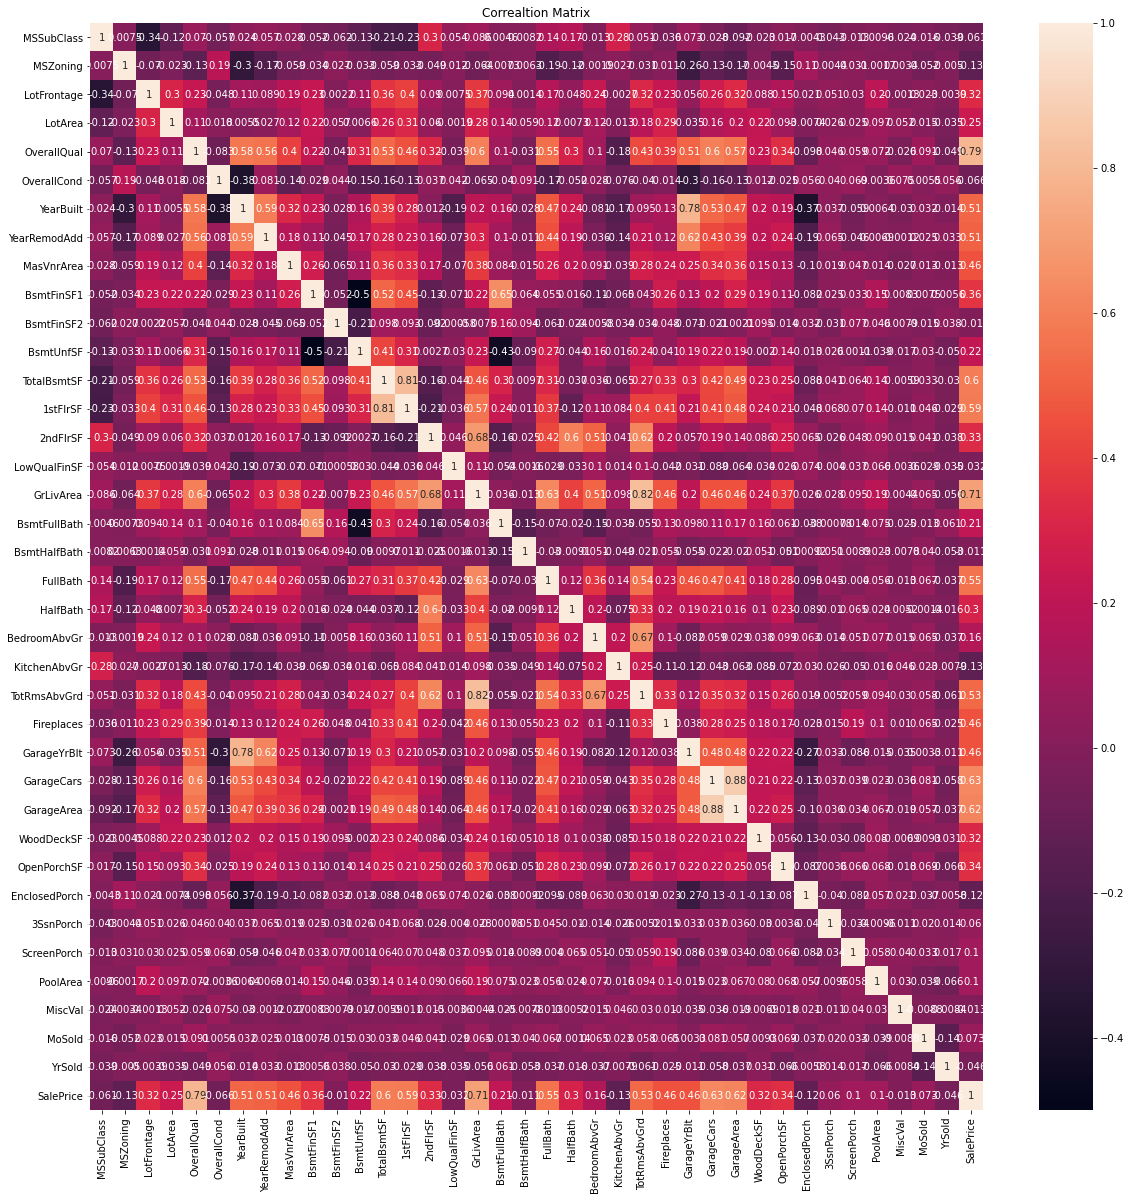

In [60]:
#train data corelation
corr_mat=train.corr()
#size of the canvas
plt.figure(figsize=[20,20])
#plt the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title('Correaltion Matrix')
plt.show()

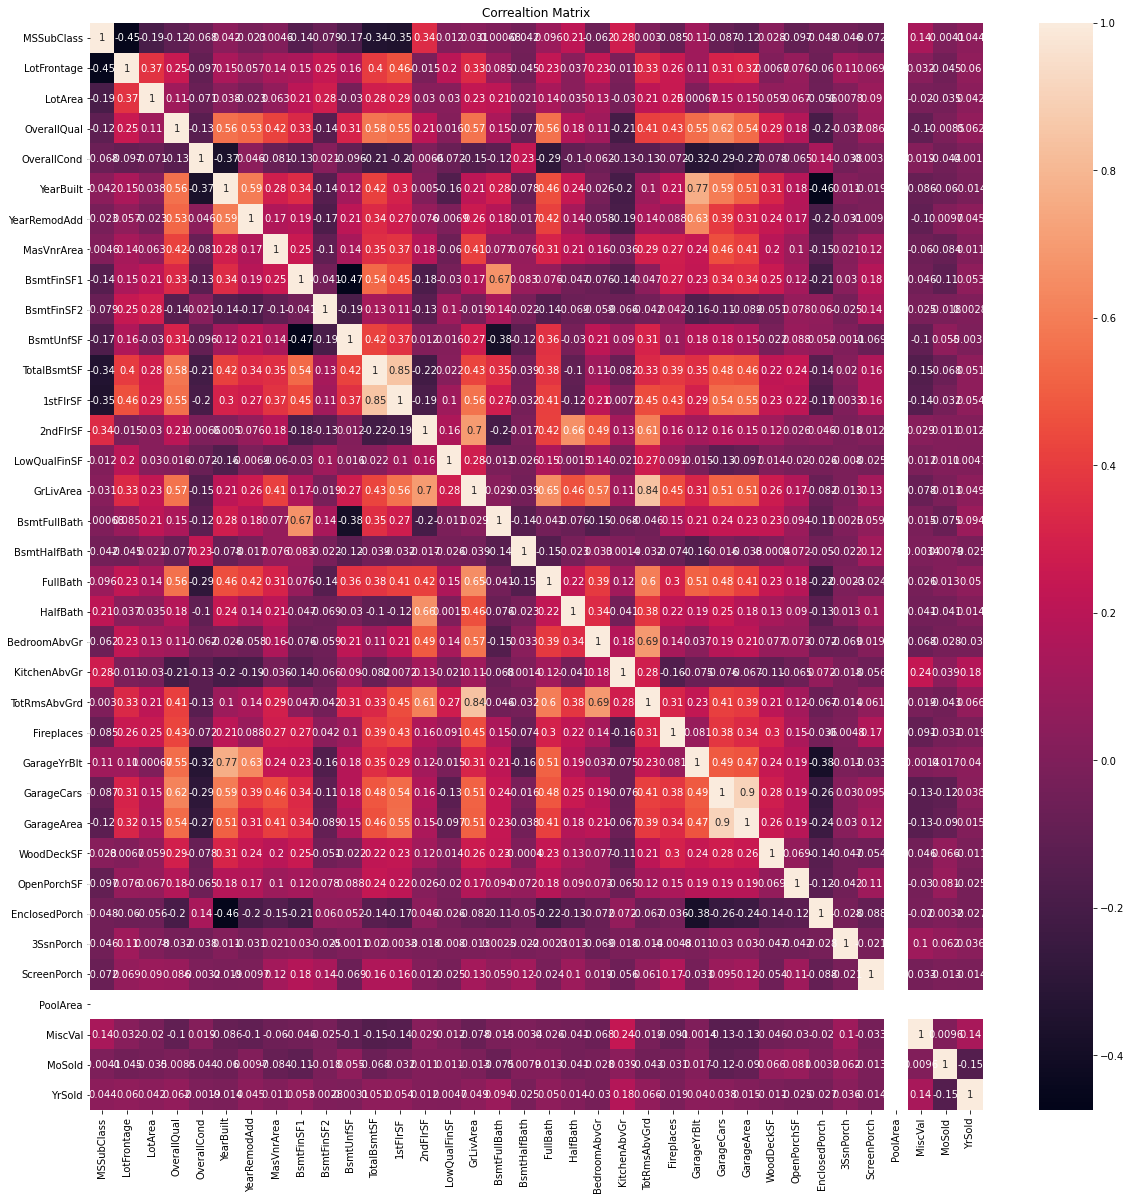

In [61]:
#test data corelation
corr_mat=test.corr()
#size of the canvas
plt.figure(figsize=[20,20])
#plt the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title('Correaltion Matrix')
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:y

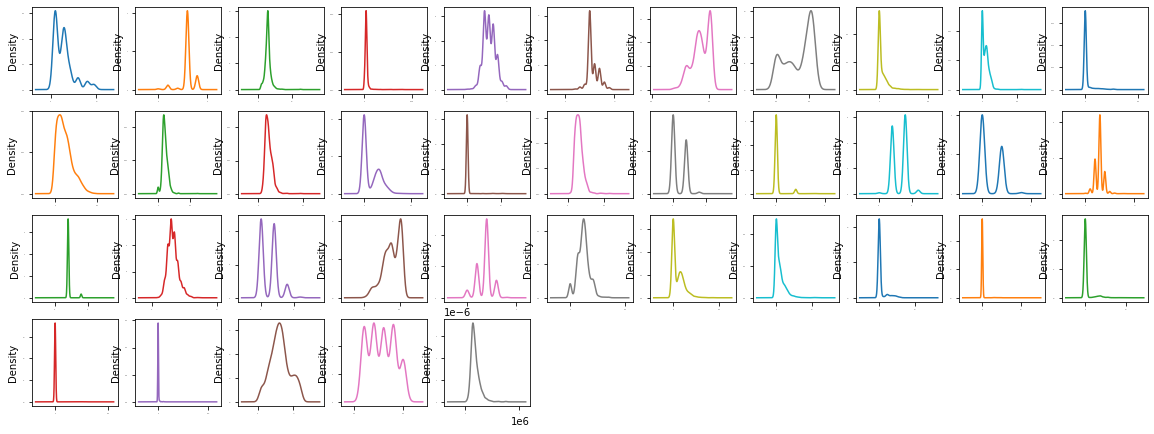

In [62]:
train.plot(kind='density',subplots=True,layout=(8,11),sharex=False,legend=False,fontsize=1,figsize=(20,15))

We can see that data is not normally distributed in some of the columns. So we will try to remove the skewness from the data.

splitting the independent variable and target variable into x and y before removinf skewness

In [63]:
train['MSZoning']=lencode.fit_transform(train['MSZoning'])

In [68]:
x=tr_data.drop('SalePrice',axis=1)
y=tr_data['SalePrice']

In [69]:
#checking skweness
x.skew().sort_values(ascending=False)

MiscVal       23.065943
PoolArea      13.243711
Condition2    11.514458
LotArea       10.659285
Heating       10.103609
                ...    
SaleType      -3.660513
Functional    -3.999663
GarageQual    -4.582386
GarageCond    -5.422472
Street       -17.021969
Length: 75, dtype: float64

AS we can see skewness is present in most of the columns so we will remove it by using power transform function. range of skewness is considered as (-0.5 to 0.5).

In [70]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [67]:
train['MSZoning'].value_counts()

3    928
4    163
1     52
2     16
0      9
Name: MSZoning, dtype: int64

In [71]:
type(x_new)

numpy.ndarray

In [72]:
x=pd.DataFrame(x_new,columns=x.columns)

In [73]:
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.370435,-0.162456,0.093658,-1.213954,0.058621,-1.366794,0.341434,0.0,0.617281,-0.238775,0.198357,0.053284,0.0038,2.310950,-0.463401,-0.052799,-0.496528,0.026859,-0.613054,-0.388056,-0.088315,-0.326182,-0.209982,0.383932,-0.812901,0.778521,0.377961,-0.558722,-0.606202,0.300945,0.673258,-1.621557,-0.112649,0.360988,-0.363019,0.903777,0.099335,-0.092972,1.231264,0.267506,0.302595,-0.458345,-0.871745,-0.14173,-1.236502,-0.837006,-0.238775,0.802290,-0.782707,-1.083459,-0.169259,0.944965,-0.984125,0.276573,0.777879,1.673239,-0.673804,-0.219139,-0.376496,0.259753,-0.113082,0.220168,0.195505,0.300947,-0.959773,1.409990,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-1.719437,-0.604806,0.409069,0.029735
1,-1.167999,-0.162456,1.117135,1.100521,0.058621,-1.366794,0.341434,0.0,0.617281,4.188040,0.037086,0.053284,0.0038,-0.436548,-0.463401,1.345826,0.407009,-0.185817,-0.854247,-5.058580,5.396201,1.159356,1.119374,0.383932,-0.812901,-1.124906,-2.646123,0.852373,0.982931,-3.324610,-1.419429,-1.621557,0.394677,-2.532187,2.756067,1.027313,2.374300,-0.092972,-0.968376,0.267506,0.302595,2.122554,-0.871745,-0.14173,1.295050,1.176812,-0.238775,0.802290,-0.782707,1.356214,-0.169259,-0.687929,0.943901,0.276573,0.777879,1.673239,-0.673804,-0.505658,0.972281,0.259753,0.678810,0.220168,0.195505,0.300947,0.781991,1.414498,-0.411301,-0.138554,3.360787,-0.077648,-0.193133,1.320612,-0.604806,0.409069,0.029735
2,0.490047,-0.162456,0.998803,0.158048,0.058621,-1.366794,0.341434,0.0,-1.482445,-0.238775,0.512775,0.053284,0.0038,-0.436548,1.021519,0.656375,-0.496528,0.836680,0.495717,-0.388056,-0.088315,-0.646692,-0.781046,0.383932,-0.812901,-1.124906,0.377961,0.852373,-0.606202,0.300945,-1.754271,-0.363268,0.925416,0.360988,-0.363019,-0.504500,0.185571,-0.092972,-0.968376,0.267506,0.302595,0.058641,1.176207,-0.14173,1.003880,1.176812,-0.238775,0.802290,1.268421,0.151784,-0.169259,0.944965,0.943901,0.276573,0.777879,1.673239,-0.673804,0.769650,0.972281,0.259753,-0.045422,0.220168,0.195505,0.300947,1.043999,1.198911,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-0.076750,-0.604806,0.409069,0.029735
3,-1.167999,-0.162456,1.495566,0.496002,0.058621,-1.366794,0.341434,0.0,0.617281,-0.238775,0.356843,0.053284,0.0038,-0.436548,-0.463401,-0.052799,0.407009,0.063582,-0.569998,1.737139,-0.088315,-0.326182,-0.209982,-1.237353,1.390202,0.778521,0.377961,-0.558722,-0.606202,0.300945,0.673258,-0.945784,0.797133,0.360988,-0.363019,1.160517,1.674462,-0.092972,-0.968376,0.267506,0.302595,1.574554,-0.871745,-0.14173,0.739356,-0.837006,-0.238775,0.802290,-0.782707,0.151784,-0.169259,0.944965,0.375729,0.276573,0.777879,1.673239,-0.673804,-0.219139,-0.376496,0.259753,0.356726,0.220168,0.195505,0.300947,-0.959773,1.169545,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-2.209015,1.649761,-2.769993,0.029735
4,-1.167999,-0.162456,0.093658,1.196626,0.058621,-1.366794,0.341434,0.0,-1.025661,-0.238775,0.356843,0.053284,0.0038,-0.436548,-0.463401,-0.052799,1.234321,0.063582,0.694762,-0.388056,-0.088315,-1.468844,-1.500720,2.080260,1.155573,-1.124906,0.377961,-0.558722,-0.606202,0.300945,0.673258,-1.621557,1.176115,0.360988,-0.363019,-0.226633,1.200095,-0.092972,0.661944,0.267506,0

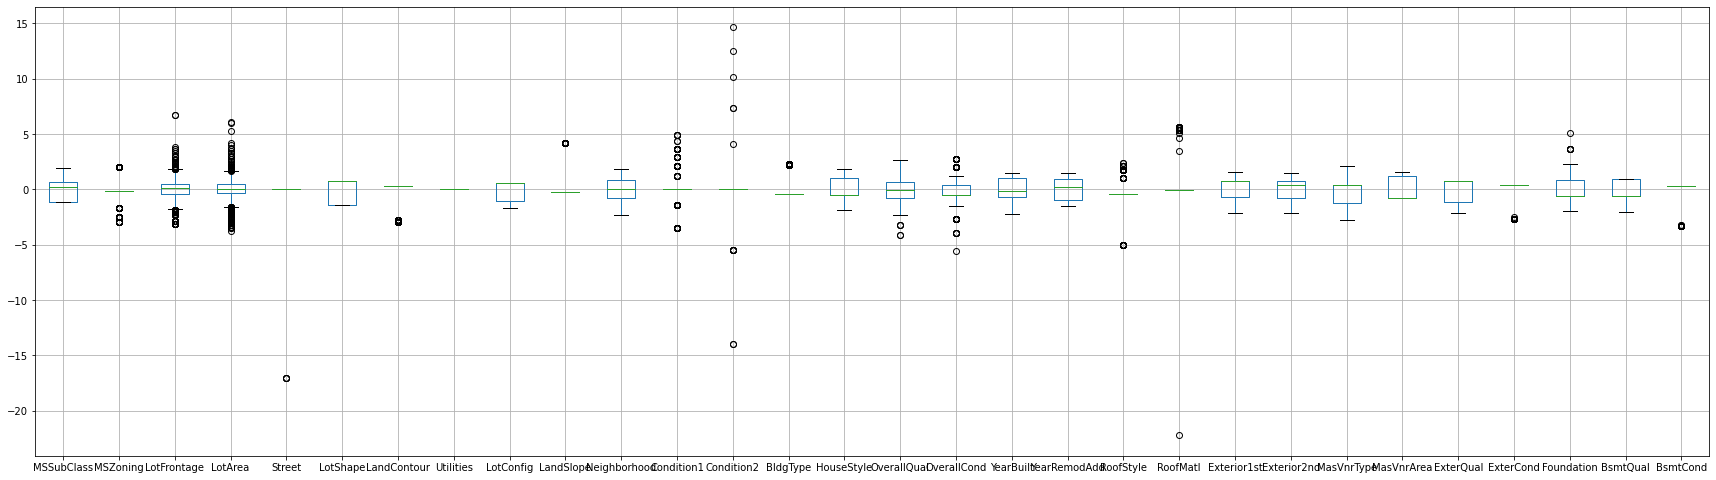

In [78]:
#checking outliers                            #for first 30 columns
x.iloc[:,0:30].boxplot(figsize=(30,8))
plt.subplots_adjust(bottom=0.10)
plt.show()

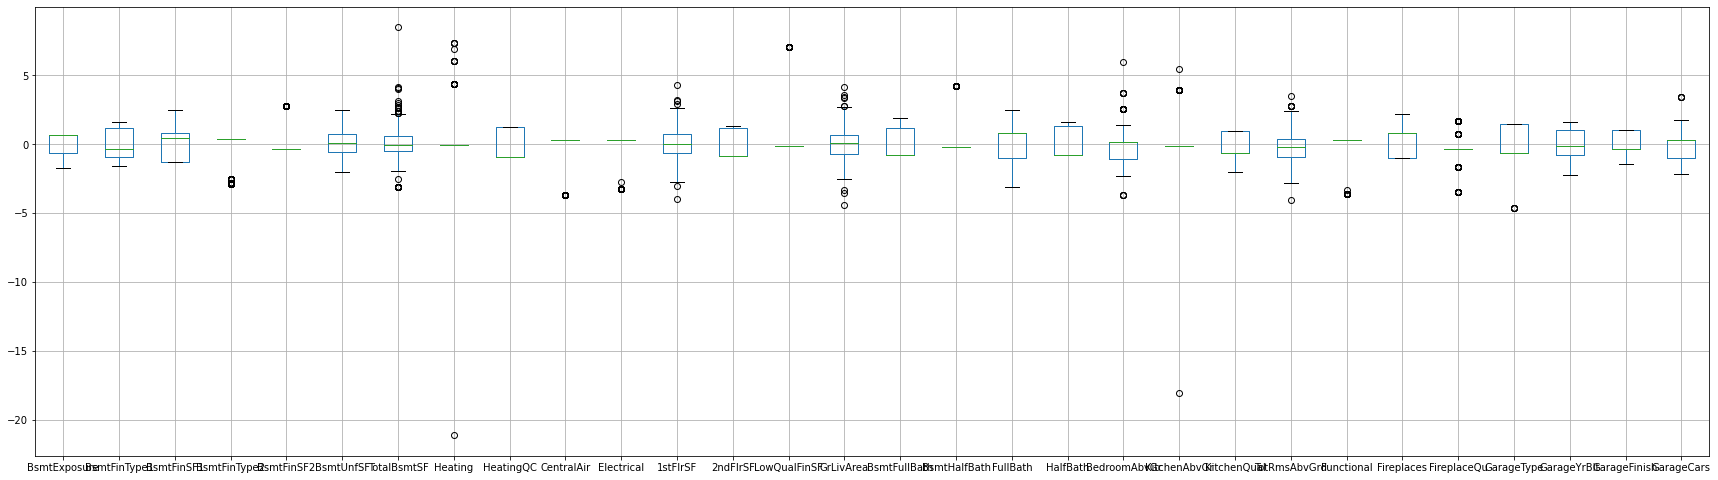

In [79]:
x.iloc[:,30:60].boxplot(figsize=(30,8))       #for next 30 columns
plt.subplots_adjust(bottom=0.10)
plt.show()

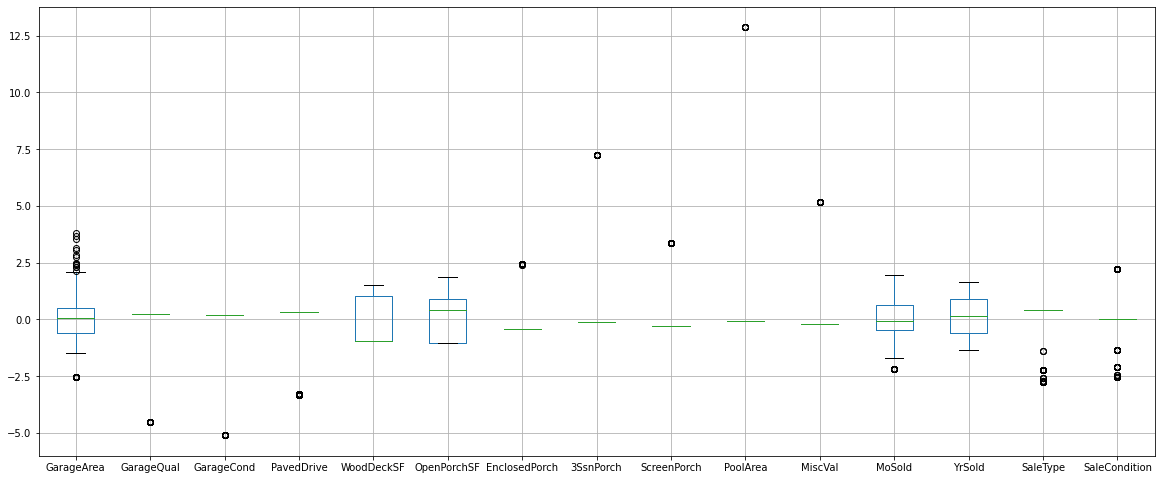

In [81]:
x.iloc[:,60:].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.10)
plt.show()

In [84]:
#REMOVING OUTLIERS USING ZSCORE
from scipy.stats import zscore
z=np.abs(zscore(tr_data))
z

array([[1.50830058, 0.02164599, 0.        , ..., 0.33003329, 0.20793187,
        0.67631017],
       [0.87704243, 0.02164599, 1.07063136, ..., 0.33003329, 0.20793187,
        1.09423443],
       [0.07709478, 0.02164599, 0.93686671, ..., 0.33003329, 0.20793187,
        1.11687211],
       ...,
       [2.46243779, 0.02164599, 2.09513215, ..., 0.33003329, 0.20793187,
        0.41705186],
       [0.31562908, 4.76211672, 0.93583847, ..., 0.33003329, 0.20793187,
        1.78922393],
       [0.07709478, 0.02164599, 0.        , ..., 0.33003329, 0.20793187,
        0.02179027]])

In [85]:
threshold=3
print(np.where(z>3))       #set threshold

(array([   1,    1,    1, ..., 1166, 1166, 1166]), array([ 9, 20, 34, ..., 39, 62, 63]))


In [86]:
# we can check the value
z[1][9]  #array1-->row.  array2-->column

3.295414143816642

In [87]:
z[1][20]

6.09040757742434

In [94]:
from sklearn.model_selection import train_test_split
#training and testing of model
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=15)

In [95]:
xtrain.shape

(817, 75)

In [96]:
xtest.shape

(351, 75)

In [97]:
ytrain.shape

(817,)

In [98]:
ytest.shape

(351,)

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regr=RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(xtrain, ytrain)
predictions=regr.predict(xtest)

In [102]:
predictions

array([201236.88405319, 204069.27737313, 135671.46726828, 146141.67658745,
       204069.27737313, 154958.52971123, 133241.47444307, 271636.59587888,
       204069.27737313, 203479.26031229, 135323.2045803 , 286300.52949388,
       140682.47995633, 373995.71516988, 149947.51702319, 348112.34860382,
       200646.86699235, 145379.63416336, 282279.42991576, 217037.22074604,
       337296.80351352, 133241.47444307, 204069.27737313, 301996.32999456,
       203479.26031229, 134392.37938243, 204069.27737313, 134761.24347084,
       146595.39689229, 150295.77971117, 133241.47444307, 200646.86699235,
       156462.23264431, 206419.87665891, 273237.22487097, 143557.49519419,
       292089.59170014, 152083.51447336, 155306.79239922, 151735.25178538,
       154583.55965243, 143557.49519419, 275547.52429364, 157388.52253644,
       145379.63416336, 144642.50896011, 145379.63416336, 143182.52513539,
       272636.00110018, 143557.49519419, 205072.4293872 , 147072.50178532,
       145639.22533142, 3

In [103]:
mean_squared_error(predictions, ytest)

2122388410.041749

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

In [114]:
lr=LinearRegression()
lr.fit(xtrain, ytrain)
predlr=lr.predict(xtest)
predlr

array([149191.4338859 , 230794.26923678, 107222.14707308, 132649.71064966,
       193149.71095657, 210990.174177  ,  56133.74008992, 183910.55865152,
       246699.07601543, 209233.53644473,  84721.24749827, 256539.64264208,
       159890.96176635, 357906.40749168, 126104.74699547, 367892.71510822,
       189833.4344385 ,  70835.11331443, 296915.03271548, 243424.23493345,
       410556.0865084 ,  25616.34094221, 194440.46062546, 263168.06935559,
       166612.16909732, 129944.01094651, 239459.40711513, 119755.14116716,
       163064.60246447, 110231.60027176,  91382.70864917, 200371.11016264,
       243230.82916796, 264560.57634534, 243451.3405782 ,  66900.67270683,
       292142.73724559, 135709.29716872, 128220.44956657, 135707.4701217 ,
       190465.28547816, 123040.08458048, 259056.60710535, 208661.8493943 ,
       125256.38859473, 114274.55075953, 147623.78380594, 180780.58148378,
       233254.98976407, 193778.21251523, 229592.5324991 , 135274.7550967 ,
       148291.22356301, 3

In [115]:
mean_squared_error(predlr, ytest)

1726782221.123934

In [121]:
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(xtrain, ytrain)
preddtr=dtr.predict(xtest)
preddtr

array([133000., 197000., 122500., 122500., 230000., 128000., 102000.,
       184100., 237000., 184000., 116050., 299800., 170000., 485000.,
        85000., 440000., 155000.,  78000., 274900., 271000., 415298.,
       102000., 195000., 255000., 135000., 109900., 205000.,  62383.,
       173733., 138500., 129900., 178000., 127500., 277000., 212000.,
        85000., 317000., 158000., 140000., 153000., 159000., 139600.,
       212000., 178900., 139000.,  62383., 144900., 185000., 230500.,
       146500., 271000., 136500., 135000., 361919., 145000., 115000.,
       383970., 120000.,  87500., 299800., 315750., 188700., 175000.,
        60000., 241500., 275000., 180000., 120000., 173000., 392500.,
       173000., 174000., 190000., 372500., 335000., 149350., 151500.,
       178900., 333168., 141000., 139000., 137500., 129000., 207500.,
       165600., 152000.,  62383., 290000., 171000., 189000., 127500.,
       167500., 209500., 189000., 123000., 139000., 176000., 139500.,
       192000., 4850